In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1dadd42e-5d3e-468e-9d18-3f445b07127d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-09-16T08:30:01.721Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9440}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9746, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [ ]:
type(data)

In [3]:
import pandas as pd


#This allows us to see all the columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9746,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915201e+07,1.915201e+07,NaN,1,NaN,NaN,None,2022-09-16T08:28:00.000Z,19705.012174,3.120466e+10,-22.5216,-0.362855,-1.888130,-4.719348,-17.197368,-11.592835,3.582357,3.773905e+11,39.3329,4.138053e+11,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
1,1027,Ethereum,ETH,ethereum,6092,2015-08-07T00:00:00.000Z,"[mineable, pos, smart-contracts, ethereum-ecos...",NaN,1.223889e+08,1.223889e+08,NaN,2,NaN,NaN,None,2022-09-16T08:28:00.000Z,1464.750724,2.009532e+10,-18.2303,-0.580179,-9.096969,-14.152129,-22.617311,-1.040714,47.606770,1.792692e+11,18.6874,1.792692e+11,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
2,825,Tether,USDT,tether,39767,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.792344e+10,7.015678e+10,NaN,3,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.000001,4.979371e+10,-21.2514,-0.000472,-0.020118,-0.019923,-0.008165,0.013507,0.124261,6.792353e+10,7.0792,7.015687e+10,None,2022-09-16T08:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-16 08:30:59.843814
3,3408,USD Coin,USDC,usd-coin,6229,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.036208e+10,5.036208e+10,NaN,4,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.000006,5.854303e+09,-15.6989,-0.015449,0.006772,0.007696,0.019364,-0.002974,0.006373,5.036239e+10,5.2487,5.036239e+10,None,2022-09-16T08:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-16 08:30:59.843814
4,1839,BNB,BNB,bnb,1104,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-16T08:28:00.000Z,272.990181,8.594504e+08,-23.6344,-0.344591,-0.633880,-6.003852,-13.646333,4.592472,36.915985,4.404349e+10,4.5906,5.459804e+10,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
5,4687,Binance USD,BUSD,binance-usd,5101,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,6,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.000034,8.591915e+09,-19.3008,0.048250,0.025866,-0.015421,0.016251,-0.143992,0.115175,2.051796e+10,2.1384,2.051796e+10,None,2022-09-16T08:28:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-16 08:30:59.843814
6,52,XRP,XRP,xrp,814,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,None,2022-09-16T08:28:00.000Z,0.325464,1.333355e+09,-3.8044,-0.075884,-4.257864,-7.208307,-14.034246,-10.583660,6.867102,1.621657e+10,1.6901,3.254639e+10,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
7,2010,Cardano,ADA,cardano,570,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,None,2022-09-16T08:28:00.000Z,0.463320,5.385189e+08,-35.0079,-0.804116,-2.256322,-5.809853,-16.990111,-2.326683,1.364624,1.583723e+10,1.6506,2.084940e+10,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
8,5426,Solana,SOL,solana,384,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.539794e+08,5.116169e+08,NaN,

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1dadd42e-5d3e-468e-9d18-3f445b07127d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    
    
 #to create csv and append data to it 
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    
   # if not os.path.isfile(r'C:\Users\User\Documents\API\APIEXCEL.csv'):
    #    df.to_csv(r'C:\Users\User\Documents\API\APIEXCEL.csv',header = 'column_names')
    #else:
     #   df.to_csv(r'C:\Users\User\Documents\API\APIEXCEL.csv',mode = 'a', header = False)
        
        
        

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit() 

{'status': {'timestamp': '2022-09-16T08:30:36.392Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9440}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9746, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\User\AppData\Local\Temp\ipykernel_7888\2312656759.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


KeyboardInterrupt: 

In [ ]:
df75 = pd.read_csv(r'C:\Users\User\Documents\API\APIEXCEL.csv')
df

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9746,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.915201e+07,1.915201e+07,NaN,1,NaN,NaN,None,2022-09-16T08:28:00.000Z,19705.012174,3.120466e+10,-22.5216,-0.362855,-1.888130,-4.719348,-17.197368,-11.592835,3.582357,3.773905e+11,39.3329,4.138053e+11,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
1,1027,Ethereum,ETH,ethereum,6092,2015-08-07T00:00:00.000Z,"[mineable, pos, smart-contracts, ethereum-ecos...",NaN,1.223889e+08,1.223889e+08,NaN,2,NaN,NaN,None,2022-09-16T08:28:00.000Z,1464.750724,2.009532e+10,-18.2303,-0.580179,-9.096969,-14.152129,-22.617311,-1.040714,47.606770,1.792692e+11,18.6874,1.792692e+11,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
2,825,Tether,USDT,tether,39767,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.792344e+10,7.015678e+10,NaN,3,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.000001,4.979371e+10,-21.2514,-0.000472,-0.020118,-0.019923,-0.008165,0.013507,0.124261,6.792353e+10,7.0792,7.015687e+10,None,2022-09-16T08:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-16 08:30:59.843814
3,3408,USD Coin,USDC,usd-coin,6229,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.036208e+10,5.036208e+10,NaN,4,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.000006,5.854303e+09,-15.6989,-0.015449,0.006772,0.007696,0.019364,-0.002974,0.006373,5.036239e+10,5.2487,5.036239e+10,None,2022-09-16T08:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-16 08:30:59.843814
4,1839,BNB,BNB,bnb,1104,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-16T08:28:00.000Z,272.990181,8.594504e+08,-23.6344,-0.344591,-0.633880,-6.003852,-13.646333,4.592472,36.915985,4.404349e+10,4.5906,5.459804e+10,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
5,4687,Binance USD,BUSD,binance-usd,5101,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,6,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.000034,8.591915e+09,-19.3008,0.048250,0.025866,-0.015421,0.016251,-0.143992,0.115175,2.051796e+10,2.1384,2.051796e+10,None,2022-09-16T08:28:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-16 08:30:59.843814
6,52,XRP,XRP,xrp,814,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,None,2022-09-16T08:28:00.000Z,0.325464,1.333355e+09,-3.8044,-0.075884,-4.257864,-7.208307,-14.034246,-10.583660,6.867102,1.621657e+10,1.6901,3.254639e+10,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
7,2010,Cardano,ADA,cardano,570,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,None,2022-09-16T08:28:00.000Z,0.463320,5.385189e+08,-35.0079,-0.804116,-2.256322,-5.809853,-16.990111,-2.326683,1.364624,1.583723e+10,1.6506,2.084940e+10,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
8,5426,Solana,SOL,solana,384,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.539794e+08,5.116169e+08,NaN,

In [8]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)


In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9746,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19152006.00000,19152006.00000,NaN,1,NaN,NaN,None,2022-09-16T08:28:00.000Z,19705.01217,31204657385.06347,-22.52160,-0.36286,-1.88813,-4.71935,-17.19737,-11.59283,3.58236,377390511394.86292,39.33290,413805255663.15002,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
1,1027,Ethereum,ETH,ethereum,6092,2015-08-07T00:00:00.000Z,"[mineable, pos, smart-contracts, ethereum-ecos...",NaN,122388899.49900,122388899.49900,NaN,2,NaN,NaN,None,2022-09-16T08:28:00.000Z,1464.75072,20095316925.21057,-18.23030,-0.58018,-9.09697,-14.15213,-22.61731,-1.04071,47.60677,179269229133.88559,18.68740,179269229133.89001,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
2,825,Tether,USDT,tether,39767,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67923438459.07519,70156782826.04665,NaN,3,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.00000,49793708538.96158,-21.25140,-0.00047,-0.02012,-0.01992,-0.00817,0.01351,0.12426,67923526994.06246,7.07920,70156874272.09000,None,2022-09-16T08:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-16 08:30:59.843814
3,3408,USD Coin,USDC,usd-coin,6229,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,50362081919.62696,50362081919.62696,NaN,4,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.00001,5854303009.31941,-15.69890,-0.01545,0.00677,0.00770,0.01936,-0.00297,0.00637,50362388455.51614,5.24870,50362388455.52000,None,2022-09-16T08:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-16 08:30:59.843814
4,1839,BNB,BNB,bnb,1104,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-09-16T08:28:00.000Z,272.99018,859450420.91063,-23.63440,-0.34459,-0.63388,-6.00385,-13.64633,4.59247,36.91598,44043488150.29371,4.59060,54598036253.66000,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
5,4687,Binance USD,BUSD,binance-usd,5101,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,20517253084.58926,20517253084.58926,NaN,6,NaN,NaN,None,2022-09-16T08:28:00.000Z,1.00003,8591915396.08250,-19.30080,0.04825,0.02587,-0.01542,0.01625,-0.14399,0.11518,20517955081.19242,2.13840,20517955081.19000,None,2022-09-16T08:28:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-09-16 08:30:59.843814
6,52,XRP,XRP,xrp,814,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49826021773.00000,99989302361.00000,NaN,7,NaN,NaN,None,2022-09-16T08:28:00.000Z,0.32546,1333354944.20387,-3.80440,-0.07588,-4.25786,-7.20831,-14.03425,-10.58366,6.86710,16216572172.56370,1.69010,32546391615.30000,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-16 08:30:59.843814
7,2010,Cardano,ADA,cardano,570,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34182044152.62900,34854947575.48000,NaN,8,NaN,NaN,None,2022-09-16T08:28:00.000Z,0.46332,538518918.67425,-35.00790,-0.80412,-2.25632,-5.80985,-16.99011,-2.32668,1.36462,15837226283.84107,1.65060,20849402089.31000,None,2022-09-16T08:28:00.000Z,NaN,NaN,NaN,NaN,

In [10]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.36286,-1.88813,-4.71935,-17.19737,-11.59283,3.58236
Ethereum,-0.58018,-9.09697,-14.15213,-22.61731,-1.04071,47.60677
Tether,-0.00047,-0.02012,-0.01992,-0.00817,0.01351,0.12426
USD Coin,-0.01545,0.00677,0.00770,0.01936,-0.00297,0.00637
BNB,-0.34459,-0.63388,-6.00385,-13.64633,4.59247,36.91598
Binance USD,0.04825,0.02587,-0.01542,0.01625,-0.14399,0.11518
XRP,-0.07588,-4.25786,-7.20831,-14.03425,-10.58366,6.86710
Cardano,-0.80412,-2.25632,-5.80985,-16.99011,-2.32668,1.36462
Solana,-0.59816,-5.00773,-7.95026,-24.27342,-22.45095,15.50117


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.36286
             quote.USD.percent_change_24h    -1.88813
             quote.USD.percent_change_7d     -4.71935
             quote.USD.percent_change_30d   -17.19737
             quote.USD.percent_change_60d   -11.59283
             quote.USD.percent_change_90d     3.58236
Ethereum     quote.USD.percent_change_1h     -0.58018
             quote.USD.percent_change_24h    -9.09697
             quote.USD.percent_change_7d    -14.15213
             quote.USD.percent_change_30d   -22.61731
             quote.USD.percent_change_60d    -1.04071
             quote.USD.percent_change_90d    47.60677
Tether       quote.USD.percent_change_1h     -0.00047
             quote.USD.percent_change_24h    -0.02012
             quote.USD.percent_change_7d     -0.01992
             quote.USD.percent_change_30d    -0.00817
             quote.USD.percent_change_60d     0.01351
             quote.USD.percent_change_90

In [ ]:
type(df4)

In [12]:
df5 = df4.to_frame(name= 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.36286
            quote.USD.percent_change_24h  -1.88813
            quote.USD.percent_change_7d   -4.71935
            quote.USD.percent_change_30d -17.19737
            quote.USD.percent_change_60d -11.59283
            quote.USD.percent_change_90d   3.58236
Ethereum    quote.USD.percent_change_1h   -0.58018
            quote.USD.percent_change_24h  -9.09697
            quote.USD.percent_change_7d  -14.15213
            quote.USD.percent_change_30d -22.61731
            quote.USD.percent_change_60d  -1.04071
            quote.USD.percent_change_90d  47.60677
Tether      quote.USD.percent_change_1h   -0.00047
            quote.USD.percent_change_24h  -0.02012
            quote.USD.percent_change_7d   -0.01992
            quote.USD.percent_change_30d  -0.00817
            quote.USD.percent_change_60d   0.01351
            quote.USD.percent_change_90d   0.12426
USD Coin    quote.USD.percent_change_1h   -0.01545
            quote.USD.percent_change_24h   0.00677
            quote.USD.percent_change_7d    0.00770
            quote.USD.percent_change_30d   0.01936
            quote.USD.percent_change_60d  -0.00297
            quote.USD.percent_change_90d   0.00637
BNB         quote.USD.percent_change_1h   -0.34459
            quote.USD.percent_change_24h  -0.63388
            quote.USD.percent_change_7d   -6.00385
            quote.USD.percent_change_30d -13.64633
            quote.USD.percent_change_60d   4.59247
            quote.USD.percent_change_90d  36.91598
Binance USD quote.USD.percent_change_1h    0.04825
            quote.USD.percent_change_24h   0.02587
            quote.USD.percent_change_7d   -0.01542
            quote.USD.percent_change_30d   0.01625
            quote.USD.percent_change_60d  -0.14399
            quote.USD.percent_change_90d   0.11518
XRP         quote.USD.percent_change_1h   -0.07588
            quote.USD.percent_change_24h  -4.25786
            quote.USD.percent_change_7d   -7.20831
            quote.USD.percent_change_30d -14.03425
            quote.USD.percent_change_60d -10.58366
            quote.USD.percent_change_90d   6.86710
Cardano     quote.USD.percent_change_1h   -0.80412
            quote.USD.percent_change_24h  -2.25632
            quote.USD.percent_change_7d   -5.80985
            quote.USD.percent_change_30d -16.99011
            quote.USD.percent_change_60d  -2.32668
            quote.USD.percent_change_90d   1.36462
Solana      quote.USD.percent_change_1h   -0.59816
            quote.USD.percent_change_24h  -5.00773
            quote.USD.percent_change_7d   -7.95026
            quote.USD.percent_change_30d -24.27342
            quote.USD.percent_change_60d -22.45095
            quote.USD.percent_change_90d  15.50117
Dogecoin    quote.USD.percent_change_1h   -0.49313
            quote.USD.percent_change_24h  -1.92858
            quote.USD.percent_change_7d   -5.78997
            quote.USD.percent_change_30d -29.61868
            quote.USD.percent_change_60d -10.62781
            quote.USD.percent_change_90d  13.03538
Polkadot    quote.USD.percent_change_1h   -0.45221
            quote.USD.percent_change_24h  -3.21136
            quote.USD.percent_change_7d  -10.69661
            quote.USD.percent_change_30d -22.39433
            quote.USD.percent_change_60d  -8.96842
            quote.USD.percent_change_90d   2.31172
Polygon     quote.USD.percent_change_1h   -1.00989
            quote.USD.percent_change_24h  -5.63829
            quote.USD.percent_change_7d   -8.07380
            quote.USD.percent_change_30d -13.26181
            quote.USD.percent_change_60d  -9.47585
            quote.USD.percent_change_90d 122.06221
Dai         quote.USD.percent_change_1h   -0.05544
            quote.USD.percent_change_24h   0.05123
            quote.USD.percent_change_7d   -0.08097
            quote.USD.percent_change_30d   0.05443
            quote.USD.percent_change_60d  -0.01747
            quo

In [ ]:
df5.count()

In [13]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.36286
1,Bitcoin,quote.USD.percent_change_24h,-1.88813
2,Bitcoin,quote.USD.percent_change_7d,-4.71935
3,Bitcoin,quote.USD.percent_change_30d,-17.19737
4,Bitcoin,quote.USD.percent_change_60d,-11.59283
5,Bitcoin,quote.USD.percent_change_90d,3.58236
6,Ethereum,quote.USD.percent_change_1h,-0.58018
7,Ethereum,quote.USD.percent_change_24h,-9.09697
8,Ethereum,quote.USD.percent_change_7d,-14.15213
9,Ethereum,quote.USD.percent_change_30d,-22.61731


In [14]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.36286
1,Bitcoin,quote.USD.percent_change_24h,-1.88813
2,Bitcoin,quote.USD.percent_change_7d,-4.71935
3,Bitcoin,quote.USD.percent_change_30d,-17.19737
4,Bitcoin,quote.USD.percent_change_60d,-11.59283
5,Bitcoin,quote.USD.percent_change_90d,3.58236
6,Ethereum,quote.USD.percent_change_1h,-0.58018
7,Ethereum,quote.USD.percent_change_24h,-9.09697
8,Ethereum,quote.USD.percent_change_7d,-14.15213
9,Ethereum,quote.USD.percent_change_30d,-22.61731


In [15]:
df7['percent_change'] =  df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.36286
1,Bitcoin,24h,-1.88813
2,Bitcoin,7d,-4.71935
3,Bitcoin,30d,-17.19737
4,Bitcoin,60d,-11.59283
5,Bitcoin,90d,3.58236
6,Ethereum,1h,-0.58018
7,Ethereum,24h,-9.09697
8,Ethereum,7d,-14.15213
9,Ethereum,30d,-22.61731


In [ ]:
!pip install seaborn

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

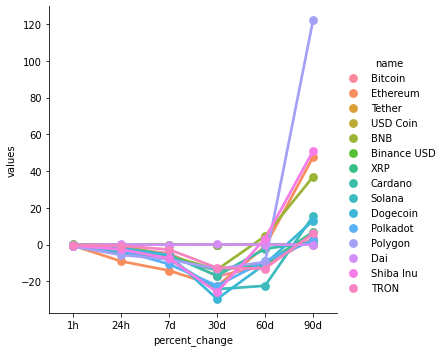

In [17]:
sns.catplot(x='percent_change',y = 'values',hue='name', data=df7, kind = 'point')


In [18]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,19705.01217,2022-09-16 08:30:59.843814
0,Bitcoin,19705.01217,2022-09-16 08:31:23.542937


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

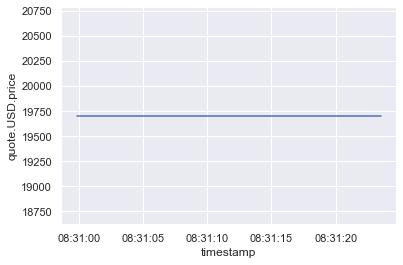

In [19]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df10)